## Setup

### Load packages

In [11]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(dplyr)
    library(statsr)
    library(GGally)
})

### Load data

Make sure your data and R Markdown files are in the same directory. When loaded
your data file will be called `movies`. Delete this note when before you submit 
your work. 

In [2]:
load("movies.Rdata")

## Part 1: Data

The dataset consists of 651 randomly sampled movies. Based on this assumption about the sampling, we can accept the generalizability of the inferences done during the current study. Since movies are randomly sampled, there are no bias caused by `genre`, `actors`, `studio` among others. We will also assume that the samples are independent between each other, which is also quite plausible considering the sample randomness.

As previously commented, since the samples are randomly selected, we can assume causality in the correlations obtained. For so, the confounding variables should have been distributed uniformly between classes.

### A Quick Look to the Dataset

Let's take a first look at the dataset that will be used for the Explanatory Data Analysis (EDA) and the following modelling. We will start having a look at the first observations. As it can also be observed the dataset consists of 651 observations and 32 features.

In [5]:
dim(movies)
head(movies, 5)

[1] 651  32

title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,⋯,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Filly Brown,Feature Film,Drama,80,R,Indomina Media Inc.,2013,4,19,2013,⋯,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
The Dish,Feature Film,Drama,101,PG-13,Warner Bros. Pictures,2001,3,14,2001,⋯,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
Waiting for Guffman,Feature Film,Comedy,84,R,Sony Pictures Classics,1996,8,21,2001,⋯,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
The Age of Innocence,Feature Film,Drama,139,PG,Columbia Pictures,1993,10,1,2001,⋯,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
Malevolence,Feature Film,Horror,90,R,Anchor Bay Entertainment,2004,9,10,2005,⋯,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


Next, let's take a look at the variable types in the dataset. This will help us determine which features may be used to generate a Multiple Linear Regression (MLR) model.

In [6]:
str(movies)

tibble [651 × 32] (S3: tbl_df/tbl/data.frame)
 $ title           : chr [1:651] "Filly Brown" "The Dish" "Waiting for Guffman" "The Age of Innocence" ...
 $ title_type      : Factor w/ 3 levels "Documentary",..: 2 2 2 2 2 1 2 2 1 2 ...
 $ genre           : Factor w/ 11 levels "Action & Adventure",..: 6 6 4 6 7 5 6 6 5 6 ...
 $ runtime         : num [1:651] 80 101 84 139 90 78 142 93 88 119 ...
 $ mpaa_rating     : Factor w/ 6 levels "G","NC-17","PG",..: 5 4 5 3 5 6 4 5 6 6 ...
 $ studio          : Factor w/ 211 levels "20th Century Fox",..: 91 202 167 34 13 163 147 118 88 84 ...
 $ thtr_rel_year   : num [1:651] 2013 2001 1996 1993 2004 ...
 $ thtr_rel_month  : num [1:651] 4 3 8 10 9 1 1 11 9 3 ...
 $ thtr_rel_day    : num [1:651] 19 14 21 1 10 15 1 8 7 2 ...
 $ dvd_rel_year    : num [1:651] 2013 2001 2001 2001 2005 ...
 $ dvd_rel_month   : num [1:651] 7 8 8 11 4 4 2 3 1 8 ...
 $ dvd_rel_day     : num [1:651] 30 28 21 6 19 20 18 2 21 14 ...
 $ imdb_rating     : num [1:651] 5.5 7.3 7.6 7.

## Part 2: Research question

An important factor to choose a movie, are the comments and the score left by others. Does the critic score affects the audience score? are somehow correlated between them? Are the professional movie critics biased by their own point of view?

In this project we will try to determine if there are features (explanatory variables) which might predict the movie score. Or if in the other case, there are no elements (at least in the dataset) which might contribute to the audience ranking

- Is/Are there any feature/s which might explain the `audience_score`?

## Part 3: Exploratory data analysis

### Data cleaning

Let's first select and clean the features that we're going to use during modelling.

In [37]:
movies_cln <- movies %>%
        filter(!is.na(thtr_rel_year),!is.na(runtime), !is.na(imdb_rating),
               !is.na(critics_score), !is.na(audience_score), !is.na(title_type),
               !is.na(genre), !is.na(mpaa_rating), !is.na(studio), !is.na(dvd_rel_year),
               !is.na(best_pic_nom), !is.na(best_actor_win), !is.na(best_actress_win), 
               !is.na(best_dir_win), !is.na(top200_box))

### Plots

In [43]:
options(repr.plot.width=10, repr.plot.height=8)

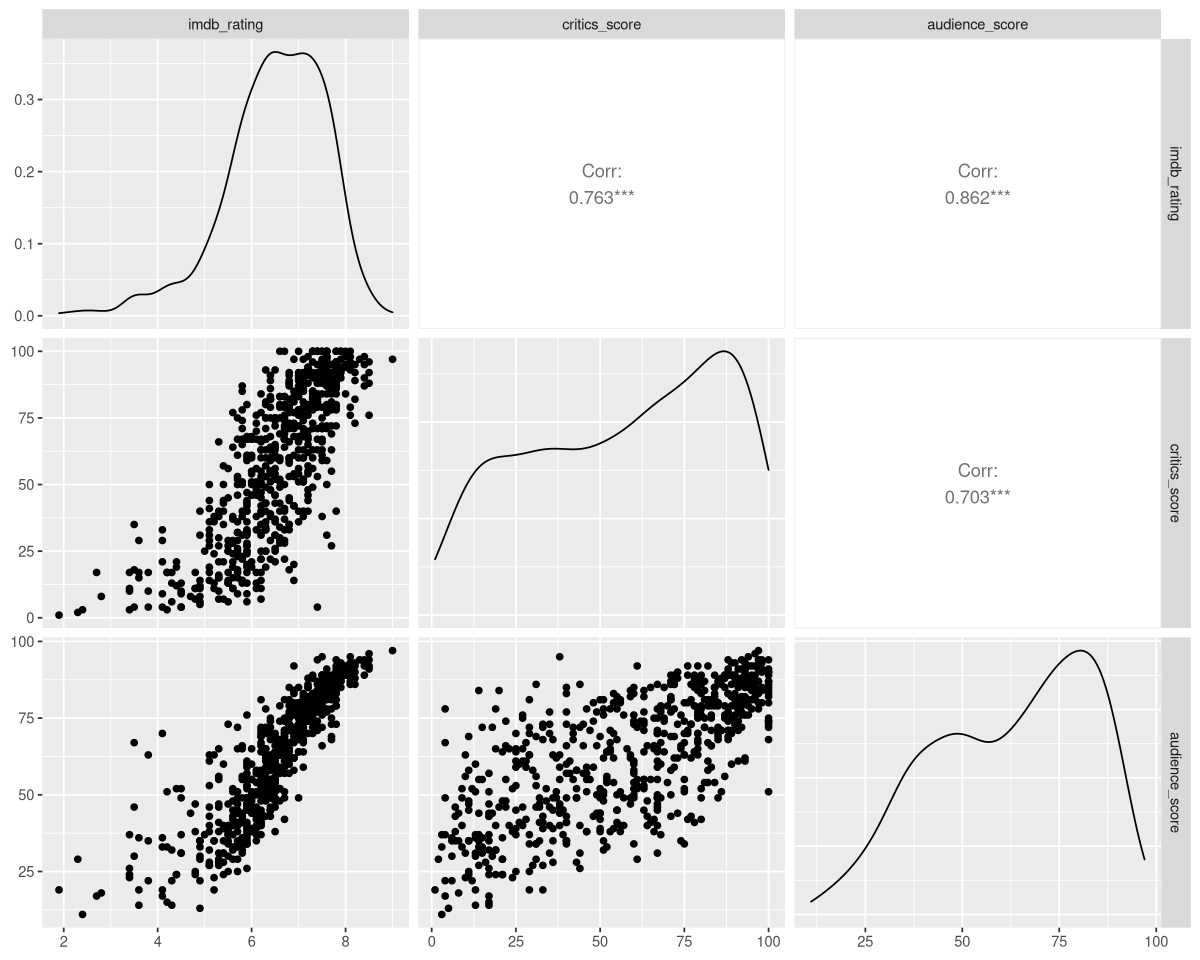

In [44]:
movies_cln %>%
    ggpairs(columns=c('imdb_rating', 'critics_score', 'audience_score'))

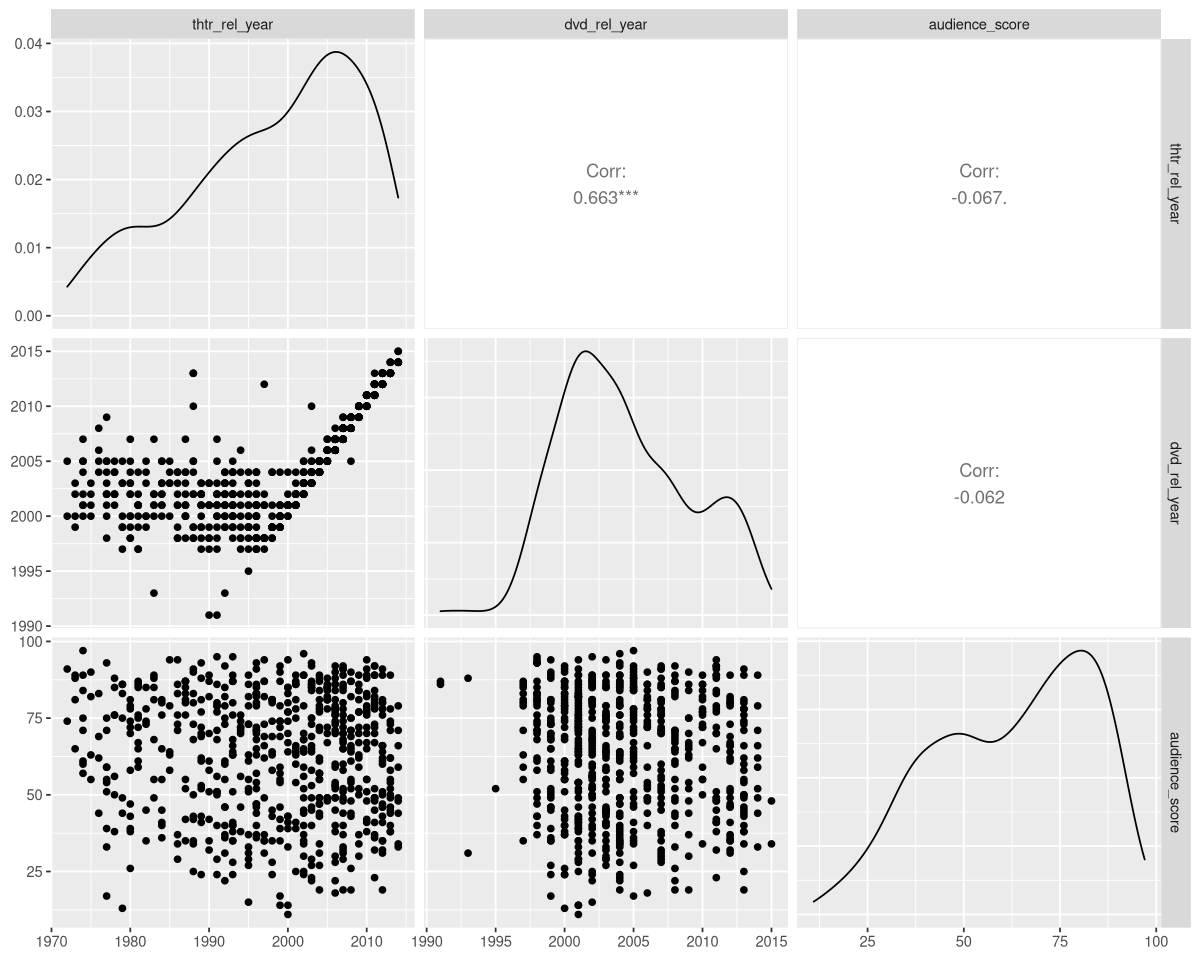

In [47]:
movies_cln %>%
    ggpairs(columns=c('thtr_rel_year', 'dvd_rel_year', 'audience_score'))

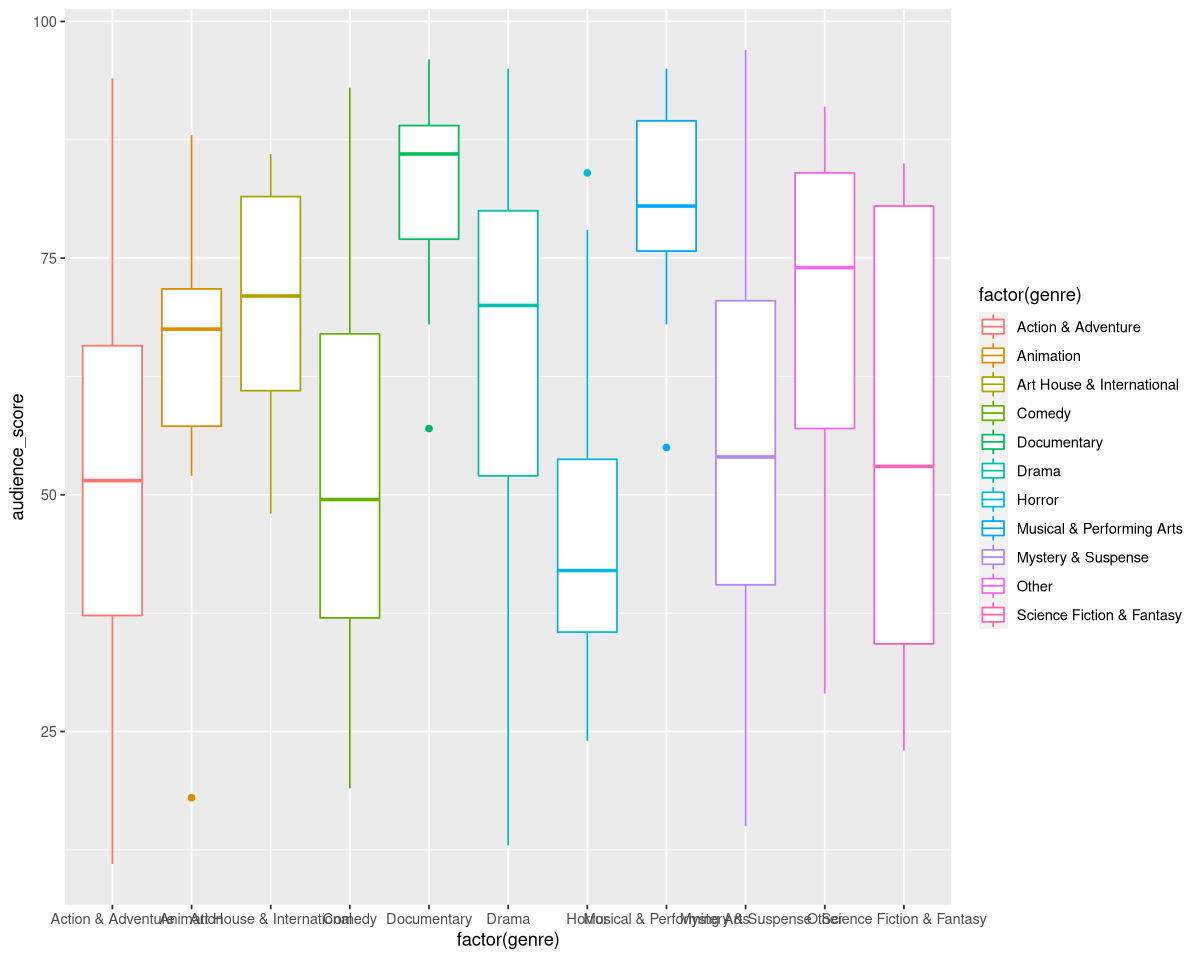

In [45]:
ggplot(movies_cln, aes(x=factor(genre), y=audience_score, colour=factor(genre))) +
        geom_boxplot()

studio,count
<fct>,<int>
Paramount Pictures,37
Warner Bros. Pictures,30
Sony Pictures Home Entertainment,27
Universal Pictures,23
Warner Home Video,19
Miramax Films,18
20th Century Fox,17
MGM,15
Twentieth Century Fox Home Entertainment,14


ERROR while rich displaying an object: Error: stat_bin() can only have an x or y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(c

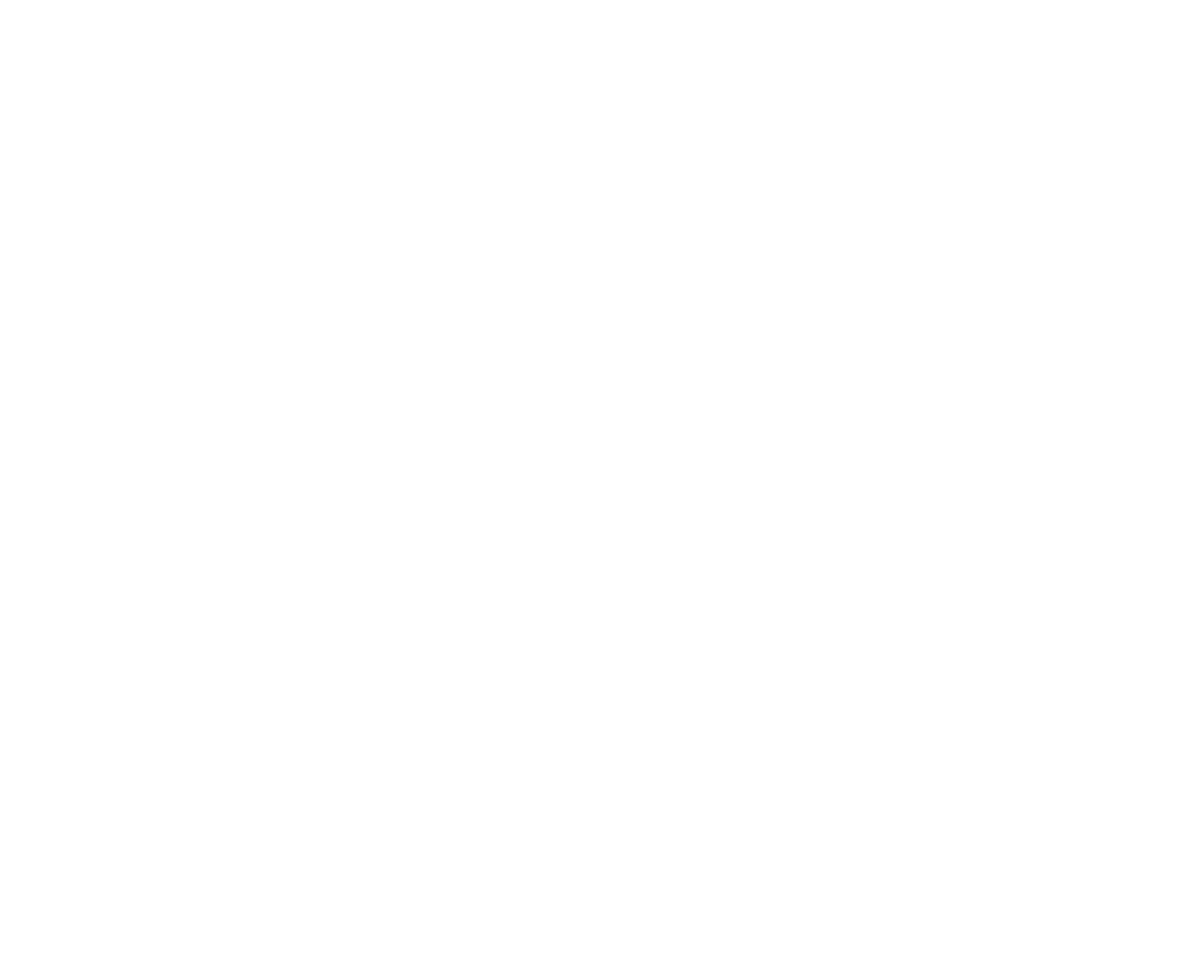

In [71]:
studios <- movies_cln %>%
    group_by(studio) %>%
    summarise(count = n()) %>% 
    arrange(desc(count)) %>%
    slice(seq_len(15))
studios
ggplot(studios, aes(x=studio, y=count)) + geom_histogram()


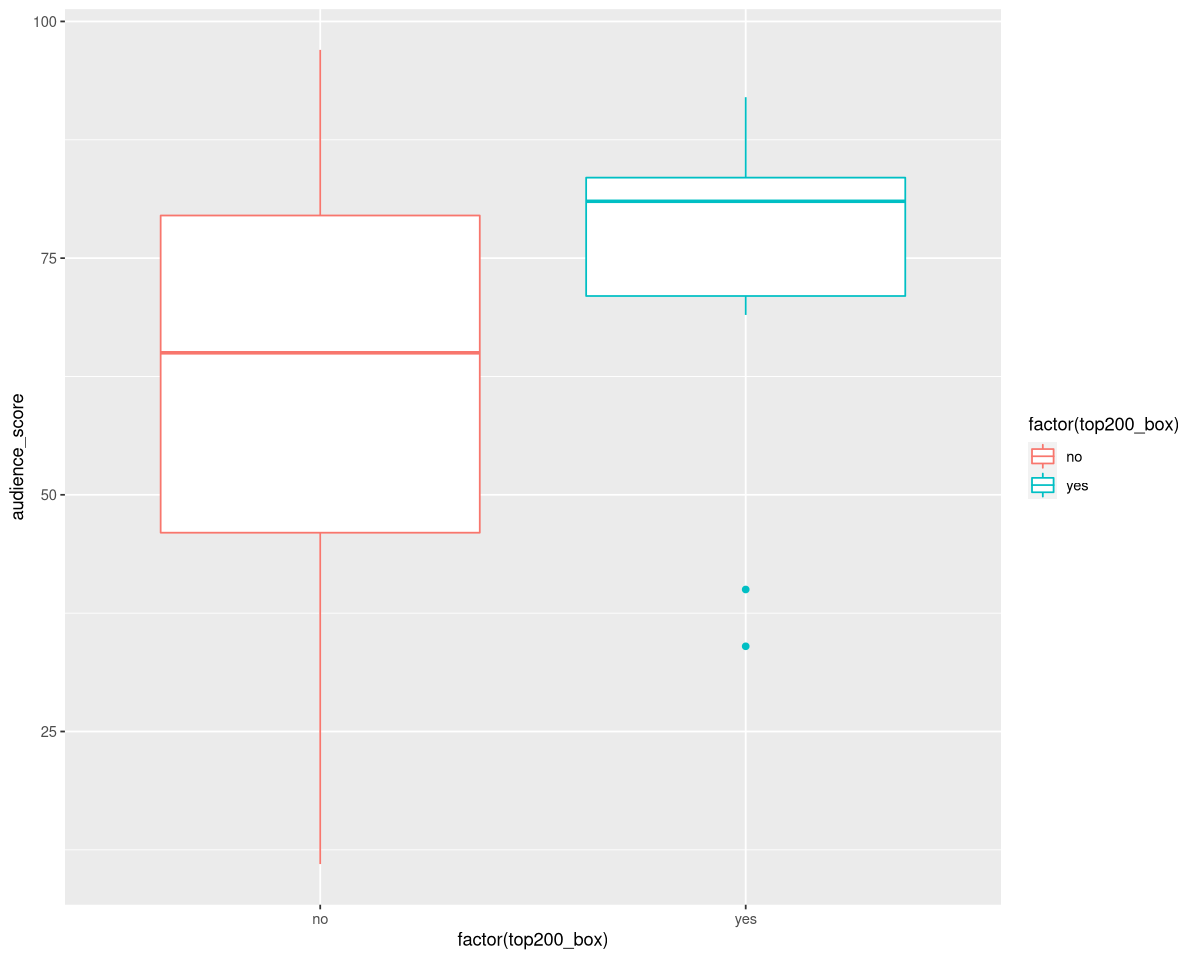

In [46]:
ggplot(movies_cln, aes(x=factor(top200_box), y=audience_score, colour=factor(top200_box))) +
        geom_boxplot()

### Summary Statistics

### Conclusions

## Part 4: Modeling

NOTE: Insert code chunks as needed by clicking on the "Insert a new code chunk" 
button above. Make sure that your code is visible in the project you submit. 
Delete this note when before you submit your work.


## Part 5: Prediction

NOTE: Insert code chunks as needed by clicking on the "Insert a new code chunk" 
button above. Make sure that your code is visible in the project you submit. 
Delete this note when before you submit your work.


## Part 6: Conclusion

## Acronyms

MLR: Multiple Linear Regression

## References